We import the csv refered to criminal activity.

In [97]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/JavierMtzZz/Mexico-Crime-dashboard/main/IDVFC_NM_ene23.csv', encoding='latin-1')

We print the information about our columns and also display the  to decide what will be the way to work with our dataframe. 

In [149]:
print(df.columns)
df.head()

Index(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
       'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Sexo',
       'Rango de edad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo,Rango de edad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Mujer,Menores de edad (0-17),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can built an idea about how we want to visuallize the dataset, in this case I want to display a Mexico map where we can select the states and show the evolution of the crime data of the selected state, in this case only showing certain types of crimes, around 4 to 7, so let's see what are the crime types to decide wich we will use.

In [99]:
pd.unique(df['Tipo de delito'])

array(['Homicidio', 'Lesiones', 'Feminicidio',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Extorsión', 'Corrupción de menores', 'Trata de personas',
       'Otros delitos contra la sociedad', 'Aborto'], dtype=object)

Within the crime types, we can decide what crimes we're interested, in this case will be the following: 'Homicidio', 'Feminicidio', 'Secuestro', 'trata de personas','Otros delitos que atentan contra la libertad personal', 'Trata de personas', 'Otros delitos que atentan contra la vida y la integridad corporal'

In [103]:
crymeTypes = ['Homicidio', 'Feminicidio', 'Secuestro', 'trata de personas','Otros delitos que atentan contra la libertad personal', 'Trata de personas', 'Otros delitos que atentan contra la vida y la integridad corporal']

In [150]:
df = df[df['Tipo de delito'].isin(crymeTypes)]

In [201]:
grpdf = df.groupby(['Año', 'Clave_Ent', 'Entidad','Tipo de delito'],as_index=False)[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum()

Now we melt the amount of cases that we have by month.

In [203]:
grpdf = pd.melt(grpdf, id_vars= ['Año', 'Clave_Ent', 'Entidad','Tipo de delito'], var_name= 'Mes', value_name = 'Conteo', ignore_index=False)

Now we will need a column to signal the date, so let's do another column with a format of (mmmm yy) by adding the month and year columns.

In [205]:
grpdf = grpdf.astype({"Año": str})

In [209]:
grpdf['fecha'] = grpdf['Mes'] + ' ' + grpdf['Año']

Having the date we can drop some the year and month columns

In [213]:
grpdf.drop(['Año', 'Mes'], inplace=True, axis=1)

Finally we save the df as a cv to do the visuallization with power BI.

In [215]:
grpdf.to_csv('filteredCrimanility.csv')

Now we will do some transforms in the csv's referred to population to group by some of the columns that we're interested. And finally at same time make the file lighter

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('base_municipios_final_datos_01.csv', encoding = 'latin-1')
df = df[df['AÑO']<=2023]
df = df.groupby(['CLAVE_ENT', 'AÑO'], as_index= False)['POB'].sum()
df.to_csv('pob1.csv')

In [ ]:
df = pd.read_csv('base_municipios_final_datos_02.csv', encoding = 'latin-1')
df = df[df['AÑO']<=2023]
df = df.groupby(['CLAVE_ENT', 'AÑO'], as_index= False)['POB'].sum()
df.to_csv('pob2.csv')

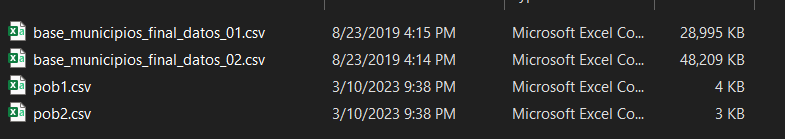

In this specific case we can see that have files that are so much lighter.